# 🧪 Sketchem: A Molecular Pictionary 
---
Welcome to this interactive Jupyter Notebook! 🎉

**About This Notebook:**
This notebook demonstrates Sketchem, an innovative tool that bridges the gap between hand-drawn chemical structures and their digital representations. Using advanced image recognition, Sketchem can identify hand-drawn molecular structures and convert them into standardized SMILES notation. But Sketchem doesn't doe just that. Whether you're a chemistry student learning to draw structures, a researcher sketching molecules, or simply interested in the intersection of chemistry and computer vision, this notebook provides insights into how Sketchem works and the problems it solves.

**Getting Started:**
Each section contains explanations, code demonstrations, and visualizations to help you understand the capabilities of Sketchem.

**How to Use:**
Feel free to run the code cells to see Sketchem in action. The notebook demonstrates key functionalities without diving too much into implementation details.

**Let's Dive In!**
Start exploring the world of molecular recognition with Sketchem! 🚀

## 🔬 Introduction: The Chemistry of Molecular Representation
---

### The Challenge of Chemical Structure Recognition

Chemical structures are the visual language of chemistry. Chemists communicate molecular structures through standardized drawings that represent atoms, bonds, and spatial arrangements. However, translating between hand-drawn structures and computer-readable formats presents significant challenges:

1. **Variability in Drawing Styles**: Different chemists may draw the same molecule with variations in bond lengths, angles, and atom placements.
2. **Complexity of Representation**: Chemical structures can range from simple linear molecules to complex polycyclic compounds with multiple functional groups.
3. **Standardization Requirements**: For computational analysis, structures must be converted to standardized formats like SMILES (Simplified Molecular Input Line Entry System).

### SMILES Notation: The Digital Language of Chemistry

blablabla

### The Role of AI in Chemical Structure Recognition

talk ab ML

## 🧪 Sketchem
---

### What is Sketchem?

Sketchem is a molecular pictionary game that combines the fun of drawing games with the educational value of learning chemical structures. It serves multiple purposes:

1. **Educational Tool**: Helps students learn to draw and memorize chemical structures
2. **AI's Capabilities**: Displays the power of multimodal models and how they can be put to good use.

### Architecture Overview

Sketchem is built using a modern web application stack:

1. **Frontend**: Streamlit for the user interface and interactive elements
2. **Drawing Interface**: Streamlit-drawable-canvas for the molecular drawing canvas
3. **AI Integration**: Google's Gemini API for image recognition and SMILES generation
4. **Chemical Processing**: RDKit for molecular validation and visualization
5. **State Management**: Streamlit's session state for game state management
6. **Multiplayer**: In-memory database for multiplayer functionality



## 📊 Educational Impact and Applications
---

Sketchem has several educational applications and impacts:

### Chemistry Education

1. **Interactive Learning**: Makes learning chemical structures more engaging and encourages repeated practice through competition
2. **Immediate Feedback**: Helps students correct their mistakes quickly using almost-instantaneous feedback called "Hints"
3. **Close to Real Life**: Our idea behind using a canvas-based drawing platform instead of the typical bond / atom molecule drawing packages was its similarity to how one would draw molecules on paper; and we strongly believe our canvas-based approach is optimized for a proper learning experience

But Sketchem is also a POC (proof of concept) for the use of AIs such as Gemini for molecule recognition:

### Research Applications

1. **Rapid Digitization**: Our code could be reused and perfected to create a tool like DECIMER that allows researchers to quickly digitize hand-drawn ideas, but without the cumbersome aspect of ML models nor the wait times associated with using ML-based packages like DECIMER.

2. **Quick Database Creations**: Our code could be reused and perfected to create a tool that generates a very detailed database that includes molecule names, SMILES strings and much more information, from a single user-typed prompt.

MORE?


## 🎮 Game Mechanics: How Sketchem Works
---

Sketchem offers both single-player and multiplayer modes, each with unique gameplay mechanics:

### Multiplayer Mode

1. **Room Creation**: A host creates a game room with a unique code, a unique molecule category, and a set game duration
2. **Player Joining**: Other players join using the room code
3. **Same Challenges**: All players receive the same molecules to draw and have to draw them before the timer ends
4. **Real-time Leaderboard**: Scores are updated in real-time and players are ranked not just based on their score but also based on the time it took them to get that score

### Single-Player Mode

1. **The Same but Better**: The singleplayer option offers all of the options of the multiplayer one, except YOU choose your own pace and what you want to work on 
2. **Validation & Feedback**: Just like for the multiplayer option, you can choose to receive immediate feedback on your drawing accuracy using the "Hint" option


The multiplayer functionality is implemented using Streamlit's session state and an in-memory database, allowing for a seamless multiplayer experience without requiring external database services like Firestore.

## 🔧 Setting Up Our Environment
---
Now that we've gotten through all the technical stuff, let's test these awesome features, shall we? 

But first, let's import all the necessary dependencies. Sketchem relies on several key libraries for all of its awesome features!

In [1]:
#IMPORT ALL NECESSARY STUFF HERE
import streamlit as st
from streamlit_drawable_canvas import st_canvas
from PIL import Image
import io
import time
from streamlit_extras.vertical_slider import vertical_slider
from sketchem.utils.back_button import back_button
from sketchem.db.mock_db import get_game
from sketchem.data.molecules import MOLECULE_CATEGORIES
from streamlit.logger import get_logger
import logging
from sketchem.utils.smiles_validator_ai import get_molecule_with_ai
from sketchem.utils.environment import get_gemini_api_key
import pubchempy as pcpfrom sketchem.utils.create_category import check_category_is_default,get_molecules_for_category_pubchem
from streamlit_extras.stoggle import stoggle
import os
from pathlib import Path
import base64



# For demonstration purposes, we'll use some pre-defined images and SMILES strings from the data folder

sample_smiles = [ # Randomly selected molecules from our game's default molecule categories
    "CC(=O)O",  # Acetic acid -> add names and make it a dict?
    "Nc1ncnc2[nH]cnc12", #Adenine
    "C1CCCCC1",  # Aspirin
    "CCO"  # Ethanol
    "CC(C)C#C", #3-Methyl-1-butyne
] #-> will have to add more pictures of these molecules (hand-drawn) to the data

## 📖 AI-Powered Category Creation
---

Our web app lets you practice molecules not only from default categories, but also from **custom lists** generated using AI! This means you can tailor the game to fit your current courses or personal learning goals. And the best part? It’s super simple!

Here’s how it works:

1. Type in the category you want to create
2. Click “Generate Category”

That’s it—you’re ready to go!
Give it a try below and see for yourself!


Allow reader to test category creation here 

In [2]:
# Code here

## 🧠 AI-Powered Molecule Recognition: The Heart of Sketchem
---

At the core of Sketchem is its AI-powered recognition system, which uses Google's Gemini AI to interpret hand-drawn molecular structures. The AI has been specifically prompted to understand chemical notation and convert drawings to SMILES strings.

### The Recognition Process

1. **Image Capture**: The drawing is captured from the canvas
2. **Preprocessing**: The image is processed to transform it into an easy-to-share format: bytes
3. **AI Analysis**: The image bytes are sent to Gemini AI with the specialized prompt
4. **SMILES Generation**: The AI generates a SMILES string based on the drawing


### Challenges in Molecular Recognition

Recognizing hand-drawn chemical structures presents several challenges:

1. **Variability in Drawing Styles**: Different users draw molecules differently
2. **Ambiguity in Representation**: Some structural features can be ambiguous
3. **Complexity of Chemical Notation**: Chemical notation has many special cases
4. **Balance Between Strictness and Flexibility**: The system must be strict enough to ensure chemical accuracy but flexible enough to accommodate different drawing styles

Sketchem addresses these challenges through its specialized AI prompt and validation system, which combines the flexibility of AI interpretation with the strictness of chemical validation.

In [3]:
# Code here for molecule recognition



In [4]:
# CODE

## 😄 Smiles Verification
---


Explain smiles veri

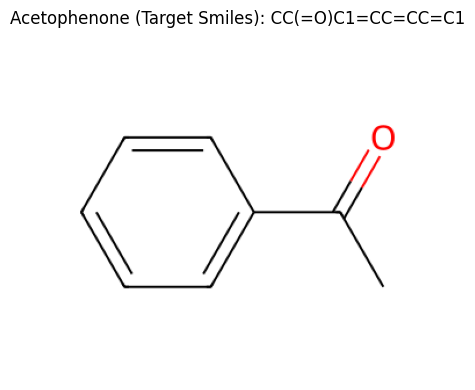

Testing validate_drawing_with_ai with different responses and thresholds:

Exact match tests (different SMILES, same structure):


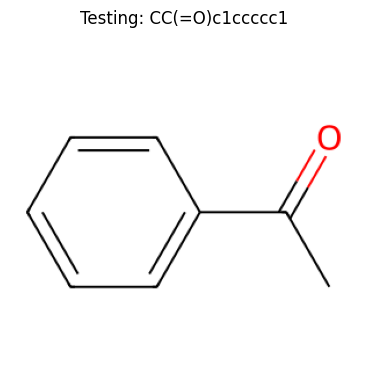

Threshold 1: ✓ Match
Threshold 0.9: ✓ Match
Threshold 0.8: ✓ Match
Threshold 0.7: ✓ Match
Threshold 0.6: ✓ Match
Threshold 0.5: ✓ Match

High similarity tests (4-methylacetophenone):


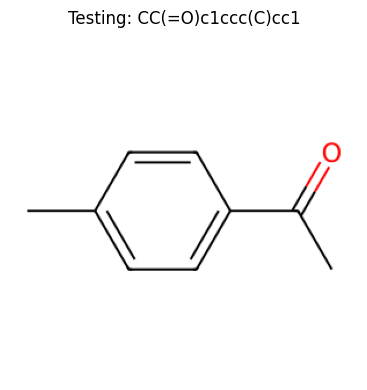

Threshold 1: ✗ No match
Threshold 0.9: ✓ Match
Threshold 0.8: ✓ Match
Threshold 0.7: ✓ Match
Threshold 0.6: ✓ Match
Threshold 0.5: ✓ Match

Medium similarity tests (Benzoic acid):


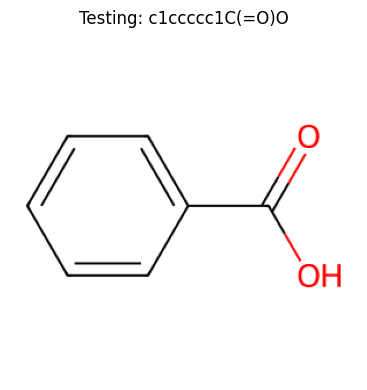

Threshold 1: ✗ No match
Threshold 0.9: ✗ No match
Threshold 0.8: ✓ Match
Threshold 0.7: ✓ Match
Threshold 0.6: ✓ Match
Threshold 0.5: ✓ Match

Low similarity tests (Acetic acid):


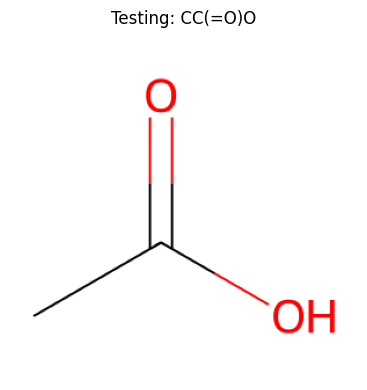

Threshold 1: ✗ No match
Threshold 0.9: ✗ No match
Threshold 0.8: ✗ No match
Threshold 0.7: ✗ No match
Threshold 0.6: ✗ No match
Threshold 0.5: ✗ No match

Different molecule tests (Benzene):


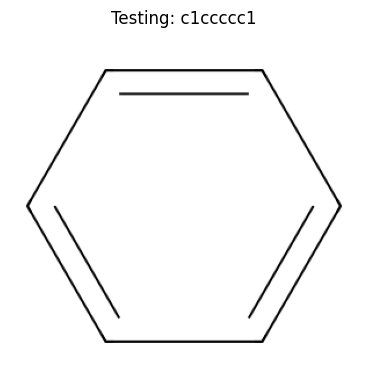

Threshold 1: ✗ No match
Threshold 0.9: ✗ No match
Threshold 0.8: ✗ No match
Threshold 0.7: ✗ No match
Threshold 0.6: ✓ Match
Threshold 0.5: ✓ Match

Invalid structure test:
Result: ✗ No match


[17:15:27] SMILES Parse Error: syntax error while parsing: INVALID_STRUCTURE
[17:15:27] SMILES Parse Error: check for mistakes around position 3:
[17:15:27] INVALID_STRUCTURE
[17:15:27] ~~^
[17:15:27] SMILES Parse Error: Failed parsing SMILES 'INVALID_STRUCTURE' for input: 'INVALID_STRUCTURE'


In [5]:
# Demonstrate validate_drawing_with_ai function
from sketchem.utils.smiles_validator_ai import validate_drawing_with_ai
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
# Set the matplotlib backend to inline for Jupyter notebooks
%matplotlib inline

# Create a mock response object to simulate Gemini API's response style
class MockResponse:
    def __init__(self, text):
        self.text = text

# Function to display molecules
def display_molecule(smiles, title=None): 
    """Display a molecule from SMILES string"""
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(300, 300))
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(title or smiles)
    plt.tight_layout()
    plt.show()

# Example target SMILES
target_smiles = "CC(=O)C1=CC=CC=C1"  # Acetophenone

# Create mock responses with different SMILES strings
exact_match_response = MockResponse("CC(=O)c1ccccc1")  # Same molecule, but a differently-written SMILES string 
high_similarity_response = MockResponse("CC(=O)c1ccc(C)cc1")  # 4-methylacetophenone (very similar)
medium_similarity_response = MockResponse("c1ccccc1C(=O)O")  # Benzoic acid (medium similarity)
low_similarity_response = MockResponse("CC(=O)O")  # Acetic acid (low similarity)
different_response = MockResponse("c1ccccc1")  # Benzene (structural fragment only)
invalid_response = MockResponse("INVALID_STRUCTURE")  # Invalid structure response

# Test with different thresholds
thresholds = [1, 0.90, 0.80, 0.70, 0.60, 0.50]

# Display target molecule
display_molecule(target_smiles, title=f"Acetophenone (Target Smiles): {target_smiles}")

print("Testing validate_drawing_with_ai with different responses and thresholds:")

print("\nExact match tests (different SMILES, same structure):")
display_molecule(exact_match_response.text, title=f"Testing: {exact_match_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(exact_match_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nHigh similarity tests (4-methylacetophenone):")
display_molecule(high_similarity_response.text, title=f"Testing: {high_similarity_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(high_similarity_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nMedium similarity tests (Benzoic acid):")
display_molecule(medium_similarity_response.text, title=f"Testing: {medium_similarity_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(medium_similarity_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nLow similarity tests (Acetic acid):")
display_molecule(low_similarity_response.text, title=f"Testing: {low_similarity_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(low_similarity_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nDifferent molecule tests (Benzene):")
display_molecule(different_response.text, title=f"Testing: {different_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(different_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nInvalid structure test:") # Should get '✗ No match' + an error from the C++ backend of RDKit (not through Python's exception mechanism)
result = validate_drawing_with_ai(invalid_response, target_smiles, 0.85)
print(f"Result: {'✓ Match' if result is True else '✗ No match'}")

## 💻 Challenges & How We Handled Them
---

At the beginning of the project, our biggest challenge was figuring out how to manage the data for all the Sketchem players. The idea of storing, organizing, and tracking such a large amount of information felt overwhelming. We initially considered using **Firebase / Firestore** (Google's game-oriented database service), which is a cloud-based database. Instead, we quickly realized that Streamlit only runs one instance of every package (for everyone that accesses the website) when it is hosted on its platform Streamlit Cloud. We thus took advantage of that to create a "mock" database which would be stored in a dictionary inside of a python file of our project and would constantly be updated according to the user interactions with the website. This way, we didn't need to maintain an external database, which made things much simpler and helped us avoid extra workload.

As we worked through the project and started developing our ideas, we ran into another big challenge: molecule recognition. Initially, we wanted to use **Decimer** to convert the hand-drawn molecules into SMILES and determine whether the drawing was correct. Although Decimer was incredibly accurate when we tested it locally, we faced several issues including long waiting times (close to 7 minutes for some molecules) and issues with running the ML model on the Streamlit Cloud platform (over-allocation of resources). This pushed us to look for another solution, and that's when we found **Google's Gemini**. Since LLMs are trained on huge amounts of data, our idea was that Gemini would be an ideal contender for Decimer. After switching to Gemini, many issues such as long wait times and allocation limits were fixed. 

Despite the slight improvement with Gemini, the switch from a dedicated ML-based package to a more generic LLM led to other issues such as uneven accuracy and difficulty in adjusting prompts to fit our needs. Not all correctly drawn molecules were recognized, and occasionally, false drawings were marked as correct. Unfortunately, no solution was found for this.


Another issue arose when we decided to use Gemini for automatic category creation. As expected, Gemini's managed to create categories of molecules linked to a specific word or sentence really accurately. However, it really lagged behind when it came to finding the appropriate SMILES for the molecules in these categories. To improve this, we had the idea to connect Gemini to **PubChem**, a specialized chemistry database. This ensured all the generated SMILES were correct and didn't cause any additional issues later during the molecule recognition process.


For building the web application, we chose **Streamlit** because it's a simple tool for creating web apps. It worked well for developing the core functionality of our project without much trouble. However, Streamlit’s simplicity meant that customizing the layout and formatting was harder than we expected. The default design didn’t meet our expectations, and it often resulted in a very plain user interface. This ended up costing us more time than we had planned. Still, we were able to make the best of it by customizing the layout as much as possible using custom div IDs from the deployed HTML code of the app, and we even created different versions of the web app depending on whether the user was on a phone or a computer.


## 🚀 Conclusion & Going Further
---

SketChem represents a meaningful step toward making chemistry more accessible and engaging. By combining interactive game modes with educational elements, it offers a fun and effective way to learn about molecules and improve structure-drawing skills. It can be used by study groups for exam preparation or by individuals during their free time. The app is suitable for all types of chemistry courses, as users can create custom molecule categories. This allows the content to be tailored to different fields such as organic, inorganic, coordination chemistry, etc.

By combining AI with multiplayer game mechanics, we believe we’ve created a unique platform for learning and practicing chemical structure drawing. The web app’s simple and intuitive design makes it accessible to everyone—no prior experience or special instructions are needed. And if any confusion does come up, the guide page provides all the necessary information for using SketChem with ease.

In this way, SketChem offers a fun and straightforward way to integrate chemistry into your daily student life. It makes learning molecules not only easier and more enjoyable, but also something you can do together with friends. It might even bring a bit of fun into exam season!


### Key Achievements

1. **Gamified Learning**: Created an engaging platform for learning chemical structures
2. **AI-Powered Recognition**: Successfully implemented AI-based recognition of hand-drawn chemical structures
3. **Multiplayer Functionality**: Implemented a seamless multiplayer experience without external databases
4. MORE...

### Future Directions

1. **Enhanced Recognition Accuracy**: Further training and optimization of the AI model
2. **Expanded Molecule Library**: More categories and better display of categories??
3. **Advanced Game Modes**: ??

